# PHASE II: Data Preparation & EDA

### GOALS:
3) 
- make a brief literature/industry research to determine similar projects to their project,
- learn from those studies’ outcomes and differentiate your project from others,
- plan and document the details of the planned implementation 
- get familiar with their datasets and carry out transformations and cleansing, if necessary, and 
- carry out some basic exploratory data analysis on their data sets.
- communicate/document the EDA results with visualizations

# IMPORTS

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# SETUP
Setup OS navigation to load files

In [2]:
# Get current file path
current_path = os.getcwd()
parent_file_path = os.path.dirname(current_path)

# Construct desired file path
file_path = f'{parent_file_path}\\data\\KAGGLE\\kaggle-oasis-1\\oasis_cross-sectional.csv'
print('file_path =', file_path)

file_path = c:\Users\GlaDOS\Documents\GitHub\eugene_data606\data\KAGGLE\kaggle-oasis-1\oasis_cross-sectional.csv


# [EDA] Exploratory Data Analysis
Let's take a look at the top of the DF

In [3]:
#* TODO -- set datatypes?
df = pd.read_csv(file_path, header = 0)
df.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


Let's take a look at some general info about this DF

In [4]:
def eda_shape(df):
    """
    Summary:
        Prints general info about a DF's shape, rows, col's, etc. with annotations

    Args:
        df (df): Pandas DF
    """
    
    print('CHARACTERISTIC | VALUE')
    print('Dimensions       =', df.ndim)
    print('Objects          =', df.size)
    print('Shape            =', df.shape)
    print('Rows             =', df.shape[0])
    print('Columns          =', df.shape[1])
    
eda_shape(df)

CHARACTERISTIC | VALUE
Dimensions       = 2
Objects          = 5232
Shape            = (436, 12)
Rows             = 436
Columns          = 12


Let's see how many empty values there are
- NOTE: if 436 rows of nulls, then the entire column is empty 
  - --> can remove from consideration
- (???) Prof said to change the import rules instead so it doesn't need to import null columns

In [5]:
null_counts = df.isnull().sum()
print('null counts = \n', null_counts)

null counts = 
 ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64


RESULTS:
- turns out none are fully null
- some of them are ~ half null though
- `Delay` is ALMOST all null

# [DATA VIZ] Heatmap of null values

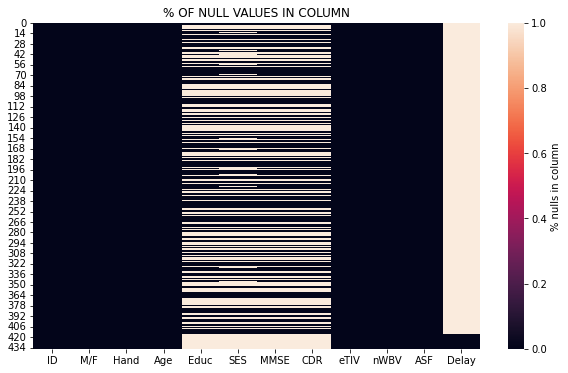

In [6]:
# Set axes size
fig, ax = plt.subplots(figsize = (10, 6))

# Create heatmap
sns.heatmap(
    data = df.isnull(),
    cbar_kws = {'label': '% nulls in column'},
    ax  = ax)

# Add title
plt.title('% OF NULL VALUES IN COLUMN')
plt.show()

Check for non-null values next

In [7]:
notnull_counts = df.notnull().sum()
print('notnull counts = \n', notnull_counts)

notnull counts = 
 ID       436
M/F      436
Hand     436
Age      436
Educ     235
SES      216
MMSE     235
CDR      235
eTIV     436
nWBV     436
ASF      436
Delay     20
dtype: int64


# [DATA VIZ] Stacked bar chart comparing:
- \# of null rows
- \# of non-null rows
  
Stacking the 2 counts together also lets us compare against the full column length
- this is essentially a percentage
- but I want to keep the raw \#s so I know how many values there will be for training later

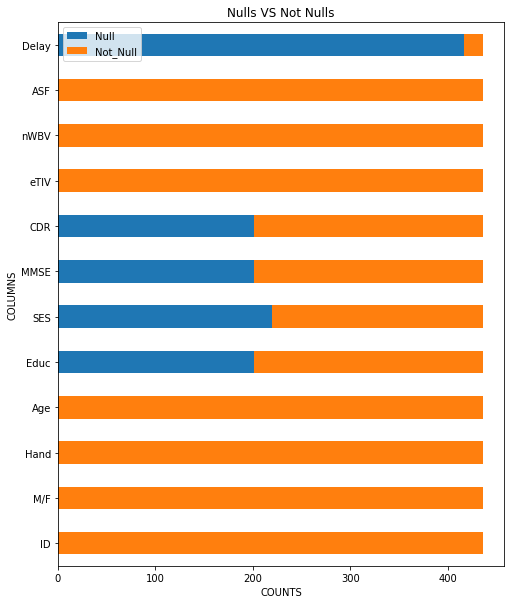

In [8]:
# Combo the 2 Series results of null/notnull counts into 1 Dataframe
df_null_vs_not_null_counts = pd.concat([null_counts, notnull_counts], 
                                       axis = 1)
df_null_vs_not_null_counts.columns = ['Null', 'Not_Null']

# Plot the stacked bar chart
df_null_vs_not_null_counts.plot(
    kind = 'barh',
    stacked = True,
    figsize = (8,10) )

# Add titles and labels
plt.title('Nulls VS Not Nulls')
plt.xlabel('COUNTS')
plt.ylabel('COLUMNS')
plt.show()

#* TODO - move the legend?

Let's check for # of unique values in each column
- HIGHER is better here ----------->
  - Caveat: 100% of the column lenght (436) is bad though, which is the ID column

In [9]:
unique_counts = df.nunique()
print('type of unique_counts =', type(unique_counts))
print(unique_counts)

type of unique_counts = <class 'pandas.core.series.Series'>
ID       436
M/F        2
Hand       1
Age       73
Educ       5
SES        5
MMSE      17
CDR        4
eTIV     312
nWBV     182
ASF      282
Delay     14
dtype: int64


In [10]:
#* TODO - put a warrning for just 1 or 100% unique counts?
# TEST
print('unique_counts[1] =', unique_counts[0])

unique_counts[1] = 436


# [DATA VIZ] Bar chart of unique value counts

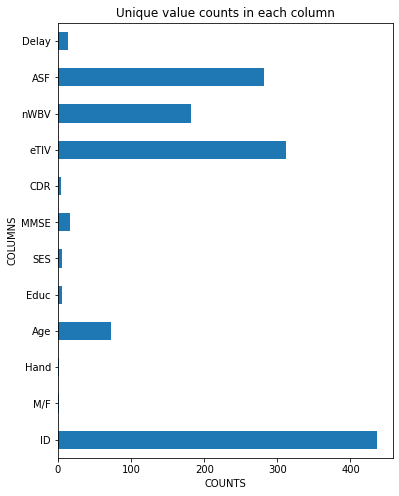

In [11]:
unique_counts.plot(kind = 'barh',
                   figsize = (6, 8))

# Add titles and labels
plt.title('Unique value counts in each column')
plt.xlabel('COUNTS')
plt.ylabel('COLUMNS')
plt.show()

RESULTS:
- Hand = 1 value --> all patients are right-handed, remove???

In [12]:
#* TODO - not sure if i should include this, delete?

# TEST
for column_number, column_name in enumerate(df.columns):
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('COL # | COL NAME')
    print(f'{column_number}     | {column_name}')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('VALUES| VALUE COUNTS')
    print(f'{df[column_name].value_counts()}')
    

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
COL # | COL NAME
0     | ID
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
VALUES| VALUE COUNTS
OAS1_0001_MR1    1
OAS1_0317_MR1    1
OAS1_0330_MR1    1
OAS1_0329_MR1    1
OAS1_0328_MR1    1
                ..
OAS1_0152_MR1    1
OAS1_0151_MR1    1
OAS1_0150_MR1    1
OAS1_0148_MR1    1
OAS1_0395_MR2    1
Name: ID, Length: 436, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
COL # | COL NAME
1     | M/F
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
VALUES| VALUE COUNTS
F    268
M    168
Name: M/F, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
COL # | COL NAME
2     | Hand
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
VALUES| VALUE COUNTS
R    436
Name: Hand, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
COL # | COL NAME
3     | Age
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
VALUES| VALUE COUNTS
20    31
22    26
21    18
23    18
73    14
      ..
94     1
37     1
93     1
96     1
91     1
Name: Age, Length: 73, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
COL # | COL NAME
4     | Educ
~~~~~~~~

# [DATA VIZ] Histograms of all columns individually 
- This combines unique counts of each column along with looking within each column for their sum of each unique value count 

n_columns = 12


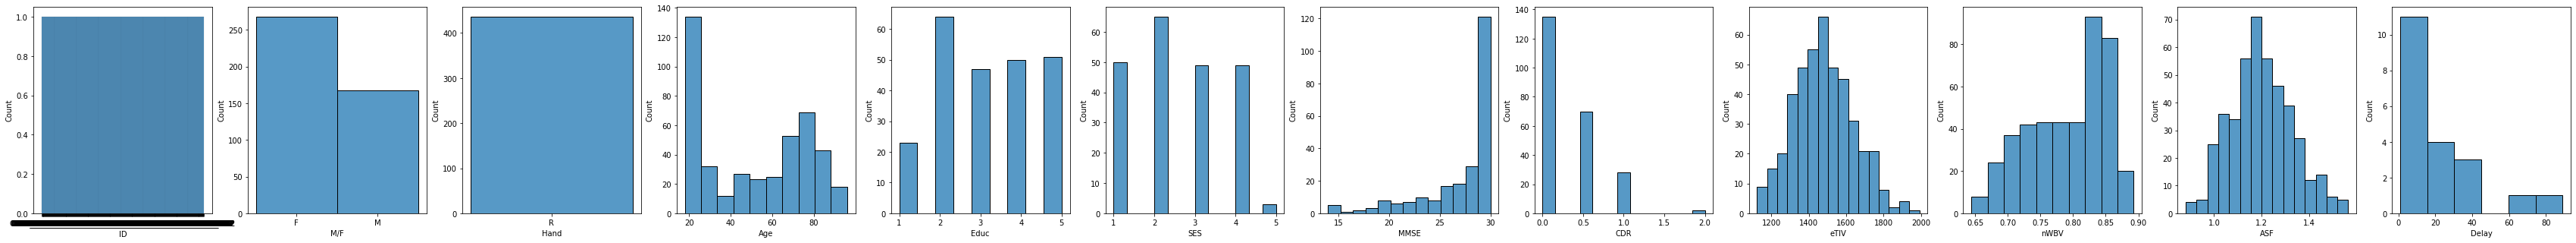

In [13]:
#* TODO - change size + arrangement, could just do it the individual boxplot method from the next cell

# Save # of columns
n_columns = len(df.columns)
print('n_columns =', n_columns)

# Create a figure with subplots
fig, axes = plt.subplots(
                nrows = 1,
                ncols = n_columns, 
                figsize = (n_columns * 5, 5) )

# Loop thru all columns to create histograms
for idx, column in enumerate(df.columns):
    sns.histplot(
        data = df, 
        x = column, 
        ax = axes[idx])

# Show 
plt.show()

# [DATA VIZ] Boxplot of numerical columns
- Loop thru the numerical columns and create individual boxplots for each

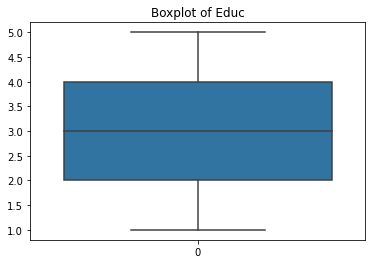

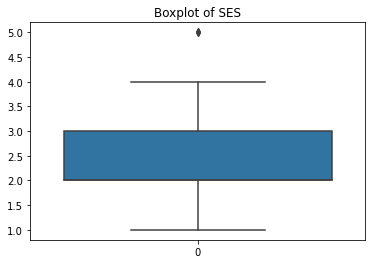

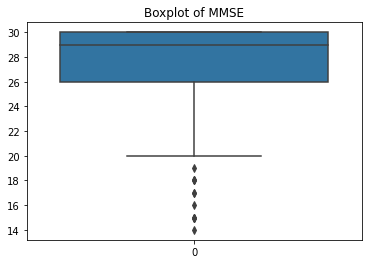

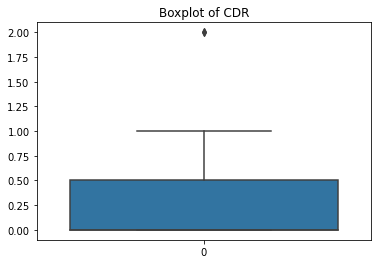

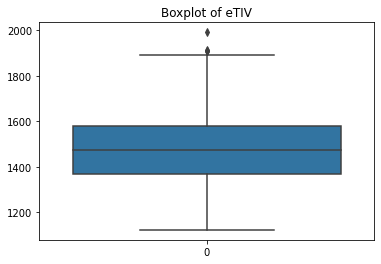

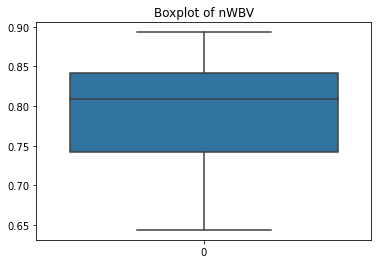

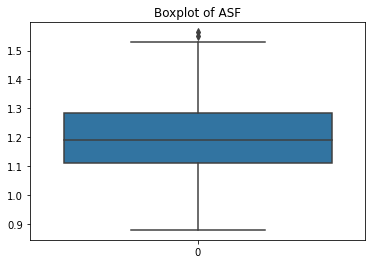

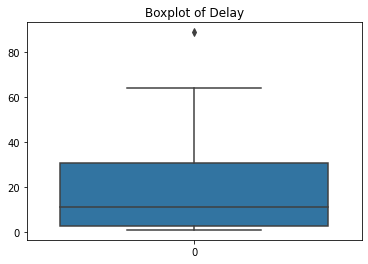

In [14]:
#* TODO - change positioning, look into sns.catplot?
#* TODO - auto check data types and add to list

# Save a list of numerical (float/int) type columns
numerical_list = ['Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'Delay']

# Loop thru numerical columns and create boxplots for each column
for column in numerical_list:
    
    # CHECK column
    #print('column =', column)
    #print('df[column] =', df[column])
    
    # Plot
    ax = sns.boxplot(
            data = df[column],
            #showfliers = False, # Prof said I should keep outliers
            )
    ax.set_title(f'Boxplot of {column}')
    plt.show()

# REFERENCE: 
- Get columns in a list format (header names)

In [15]:
print('COL # | COL NAME')
for column_number, column_name in enumerate(df.columns):
    print(f'{column_number} = {column_name}')

COL # | COL NAME
0 = ID
1 = M/F
2 = Hand
3 = Age
4 = Educ
5 = SES
6 = MMSE
7 = CDR
8 = eTIV
9 = nWBV
10 = ASF
11 = Delay


# FILTERING DATA
### Extracting variables of interest, dropping columns I can't use

DROP
- Column #1 = ID --> 100% unique, can just use index though, nothing useful to be gleaned here
- Column #2 = Hand --> all patients are right-handed, no difference in results
- Column #11 = Delay --> useful for longitudinal but probably not cross-sectional study

KEEP
- Column #7 = CDR --> Target to predict
  - Could rename into 'demented' and 'non-demented' categories, then use groupby for binary classification
  - Prof said multi-class prediction could work too

In [16]:
# Reimport, drop hand and delay columns
cols_to_drop = ['ID', 'Hand', 'Delay']
df_filtered = pd.read_csv(file_path, header = 0).drop(cols_to_drop, axis = 1)

# CHECK
print('df.shape =', df.shape)
df_filtered.head()

df.shape = (436, 12)


,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,M,28,NaN,NaN,NaN,NaN,1588,0.803,1.105
4,M,18,NaN,NaN,NaN,NaN,1737,0.848,1.010


# [OUTPUT] Export filtered dataset to new CSV file

In [17]:
# #* TODO - comment out after 1 run!!

# # Set new file path for text output
# output_file_path = f'{parent_file_path}\\output\\oasis_cross-sectional_filtered.csv'

# # Save to CSV file
# df_filtered.to_csv(output_file_path)

# Pearson Correlation
- ???

In [18]:
pearson_corr = df_filtered.corr()
pearson_corr

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
Age,1.000000,-0.207094,0.157806,-0.252123,0.299969,-0.140984,-0.874100,0.137514
Educ,-0.207094,1.000000,-0.742361,0.297317,-0.254745,0.147271,0.194903,-0.126571
SES,0.157806,-0.742361,1.000000,-0.258882,0.198240,-0.184533,-0.118403,0.167573
MMSE,-0.252123,0.297317,-0.258882,1.000000,-0.750070,-0.005727,0.469599,0.014133
CDR,0.299969,-0.254745,0.198240,-0.750070,1.000000,0.105204,-0.501014,-0.114299
eTIV,-0.140984,0.147271,-0.184533,-0.005727,0.105204,1.000000,-0.009685,-0.975666
nWBV,-0.874100,0.194903,-0.118403,0.469599,-0.501014,-0.009685,1.000000,0.013771
ASF,0.137514,-0.126571,0.167573,0.014133,-0.114299,-0.975666,0.013771,1.000000


# [DATA VIZ] Pearson Correlation
- ???

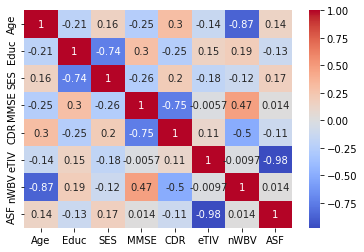

In [19]:
# Plot correlation as a heatmap
sns.heatmap(
    pearson_corr, 
    annot = True,
    cmap = 'coolwarm')
plt.show()

In [27]:
# Find highest (positive) pairwise correlations
corr_pairs_positive = pearson_corr.unstack().sort_values(ascending = False).drop_duplicates()

# Drop any perfect correlations (meaning = 1.0)
corr_pairs_positive = corr_pairs_positive[corr_pairs_positive != 1.0]
corr_pairs_positive.head(3)

MMSE  nWBV    0.469599
Age   CDR     0.299969
Educ  MMSE    0.297317
dtype: float64

In [38]:
# Find lowest (negative) pairwise correlations
corr_pairs_negative = pearson_corr.unstack().sort_values(ascending = True).drop_duplicates()

# Drop any perfect correlations (meaning = 1.0)
corr_pairs_negative = corr_pairs_negative[corr_pairs_negative != 1.0]
corr_pairs_negative.head(3)
#corr_pairs_negative

ASF  eTIV   -0.975666
Age  nWBV   -0.874100
CDR  MMSE   -0.750070
dtype: float64

In [36]:
#! ERROR - some weird merging and sorting 
# # CHECK
# print(type(corr_pairs_negative))

# # Concat the 2 series into a DF
# df_corr_pairs_both = pd.concat([corr_pairs_positive.head(3), corr_pairs_negative.head(3)], axis=1)

# # print the resulting dataframe
# print(df_corr_pairs_both)

### Top 3 Pearson Correlation results:

| Highest positive   | Lowest negative    |
| :------------------| :------------------|
| (0.47) MMSE + nWBV | (-0.98) ASF + eTIV |
| (0.30) MMSE + Educ | (-0.87) Age + nWBV |
| (0.30) Age + CDR   | (-0.75) CDR + MMSE |

# TODO

# TODO 
- need more info about the column variables to decide what to do with them
- start ML binary classification and the multi-class but don't remove the outliers

- feature importance
- remove the barcharts?

mutual information method instead of correlation matrix

Plotly express is easier than regular Plotly

CHECK:
- data distribution
- split data in categorical/numerical

# (GENERAL) QUESTIONS:
1) Do I need to include a download script thru Jupyter Notebook?
2) Where to create requirements.txt?   